In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Interesting Notes
=================
1. There are very few(under 200) games with a global sales of above 5 million, with 80 of them being from Nintendo.
2. If a game is released on multiple platforms, each platform's sales are counted separately. This means we will need to combine sales from different platforms to get the total sales for a game.
3. The top 5 best-selling games are all from Nintendo, with "Wii Sports" leading the pack with over 82 million copies sold. This is likely because each game is only released on one platform, making it easier to track total sales.

In [18]:
sales = pd.read_csv('vgsales.csv')
sales['Year'] = sales['Year'].astype('Int64')

In [19]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [20]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  Int64  
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: Int64(1), float64(5), int64(1), object(4)
memory usage: 1.4+ MB


In [21]:
sales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.0,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.0,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.0,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.0,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.0,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.0,41.490000,29.020000,10.220000,10.570000,82.740000


In [28]:
# add parentheses around each comparison when using bitwise & with boolean Series
sales.loc[(sales['Global_Sales'] > 5) & (sales['Publisher'] != 'Nintendo')]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
17,18,Grand Theft Auto: San Andreas,PS2,2004,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
23,24,Grand Theft Auto V,X360,2013,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
24,25,Grand Theft Auto: Vice City,PS2,2002,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
...,...,...,...,...,...,...,...,...,...,...,...
198,199,Grand Theft Auto: Vice City Stories,PSP,2006,Action,Take-Two Interactive,1.70,2.02,0.16,1.21,5.08
199,200,FIFA Soccer 11,PS3,2010,Sports,Electronic Arts,0.60,3.29,0.06,1.13,5.08
201,202,Resident Evil,PS,1996,Action,Virgin Interactive,2.05,1.16,1.11,0.73,5.05
202,203,Tony Hawk's Pro Skater,PS,1999,Sports,Activision,3.42,1.38,0.02,0.20,5.02


<Axes: xlabel='Global_Sales', ylabel='Density'>

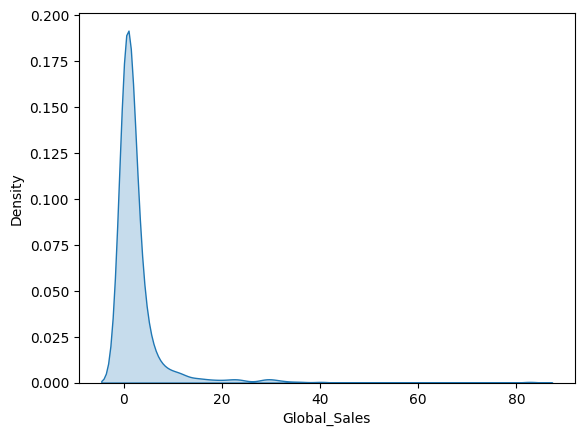

In [24]:
sns.kdeplot(data=sales[sales['Publisher'] == 'Nintendo'], x='Global_Sales', fill=True)

In [ ]:
sales[sales['Name'] == 'Minecraft']

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
72,73,Minecraft,X360,2013,Misc,Microsoft Game Studios,5.58,2.83,0.02,0.77,9.20
168,169,Minecraft,PS3,2014,Misc,Sony Computer Entertainment,1.97,2.51,0.00,0.94,5.42
297,298,Minecraft,PS4,2014,Misc,Sony Computer Entertainment Europe,1.38,1.87,0.12,0.65,4.02
643,644,Minecraft,XOne,2014,Misc,Microsoft Game Studios,1.43,0.76,0.00,0.22,2.41
713,715,Minecraft,PSV,2014,Misc,Sony Computer Entertainment Europe,0.28,0.79,0.87,0.32,2.25
4513,4515,Minecraft,WiiU,2016,Misc,Microsoft Game Studios,0.18,0.09,0.14,0.03,0.43


In [47]:
# compute mean of global sales for each genre
sales[sales['Global_Sales'] > 10].groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False)

Genre
Sports          40.115000
Puzzle          22.780000
Misc            20.330000
Platform        19.097273
Simulation      18.515000
Role-Playing    17.201111
Racing          17.115714
Action          14.812222
Shooter         14.370833
Fighting        13.040000
Adventure       11.180000
Name: Global_Sales, dtype: float64

In [44]:
sales['Name'].value_counts()[sales['Name'].value_counts() > 1]

Name
Need for Speed: Most Wanted                12
LEGO Marvel Super Heroes                    9
Madden NFL 07                               9
Ratatouille                                 9
FIFA 14                                     9
                                           ..
Knockout Kings 2001                         2
NFL Blitz                                   2
Alvin and the Chipmunks: The Squeakquel     2
Hyrule Warriors                             2
Grand Theft Auto III                        2
Name: count, Length: 2775, dtype: int64

In [56]:
sales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [60]:
sales_combined = (
    sales.groupby('Name')
    .agg({
        'Platform': lambda x: list(pd.unique(x.dropna())),
        'Year': lambda x: list(pd.unique(x.dropna())),
        'Genre': lambda x: list(pd.unique(x.dropna())),
        'Publisher': lambda x: list(pd.unique(x.dropna())),
        'NA_Sales': 'sum',
        'EU_Sales': 'sum',
        'JP_Sales': 'sum',
        'Other_Sales': 'sum',
        'Global_Sales': 'sum',
    })
    .reset_index()
)

In [61]:
sales_combined.sort_values(by='Global_Sales', ascending=False).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
11007,Wii Sports,[Wii],[2006],[Sports],[Nintendo],41.49,29.02,3.77,8.46,82.74
3712,Grand Theft Auto V,"[PS3, X360, PS4, XOne, PC]","[2013, 2014, 2015]",[Action],[Take-Two Interactive],23.46,23.04,1.39,8.03,55.92
9327,Super Mario Bros.,"[NES, GB]","[1985, 1999]",[Platform],[Nintendo],32.48,4.88,6.96,0.99,45.31
9715,Tetris,"[GB, NES]","[1989, 1988]",[Puzzle],[Nintendo],26.17,2.95,6.03,0.69,35.84
5573,Mario Kart Wii,[Wii],[2008],[Racing],[Nintendo],15.85,12.88,3.79,3.31,35.82
11009,Wii Sports Resort,[Wii],[2009],[Sports],[Nintendo],15.75,11.01,3.28,2.96,33.00
7346,Pokemon Red/Pokemon Blue,[GB],[1996],[Role-Playing],[Nintendo],11.27,8.89,10.22,1.00,31.37
1222,Call of Duty: Black Ops,"[X360, PS3, PC, Wii, DS]",[2010],[Shooter],[Activision],17.59,9.50,0.59,3.36,31.03
1228,Call of Duty: Modern Warfare 3,"[X360, PS3, PC, Wii]",[2011],[Shooter],[Activision],15.58,11.29,0.62,3.35,30.83
6723,New Super Mario Bros.,[DS],[2006],[Platform],[Nintendo],11.38,9.23,6.50,2.90,30.01


In [74]:
sales_combined['Genre'].apply(len).value_counts().sort_index()

Genre
1    11489
2        4
Name: count, dtype: int64

C:\Users\corbi\AppData\Local\Temp\ipykernel_28796\2877740138.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  sns.histplot(data=sales_combined.explode('Genre')[sales['Publisher'] == 'Nintendo'], x='Global_Sales', hue='Genre', fill=True)


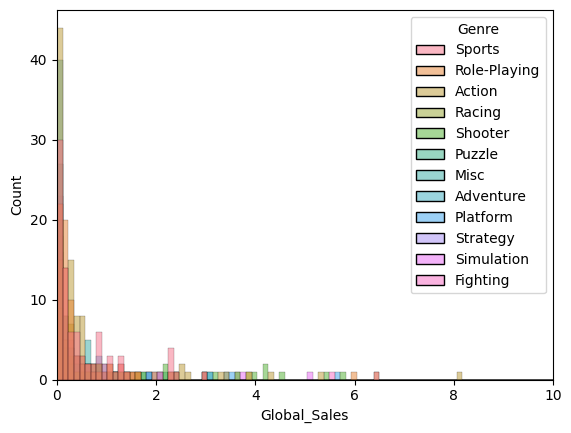

In [96]:
sns.histplot(data=sales_combined.explode('Genre')[sales['Publisher'] == 'Nintendo'], x='Global_Sales', hue='Genre', fill=True)
plt.xlim(0, 10)
plt.show()